# Circuiti 3

In [631]:
import numpy as np
from iminuit import Minuit
from iminuit.cost import LeastSquares
from scipy.stats import chi2
import matplotlib.pyplot as plt
from uncertainties import ufloat
import uncertainties.umath as uu

### Circuito RC

In [632]:
R = 266.6 #ohm
R_tot = R + 50 
C = 10 * 10 ** (-9) #farad

freq = 1 / (R_tot*C*2*np.pi)
print(freq)

50270.038879309956


In [633]:
data = np.loadtxt("Dati/RC_v2.txt") #media di 16 campionamenti

freq = []
Vin = [] #picco picco
Vout = []
Vin_out = []
phdiff = [] #phase difference

for i in range(len(data)):
    freq.append(data[i][0] * 1000)
    Vin.append(data[i][1])
    Vout.append(data[i][2])
    Vin_out.append(data[i][3])
    phdiff.append(np.pi/2 + data[i][4] * np.pi / 180)

freq = np.array(freq)
Vin = np.array(Vin)
Vout = np.array(Vout)
Vin_out = np.array(Vin_out)
phdiff = np.array(phdiff)

#### Funzione di trasferimento VB / VA

Modulo

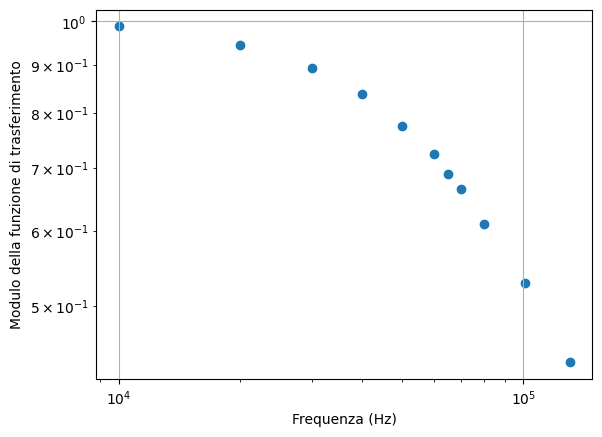

In [634]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")
ax.set_yscale("log")

plt.scatter(freq, Vout/Vin)

plt.grid()
plt.show()

Fase

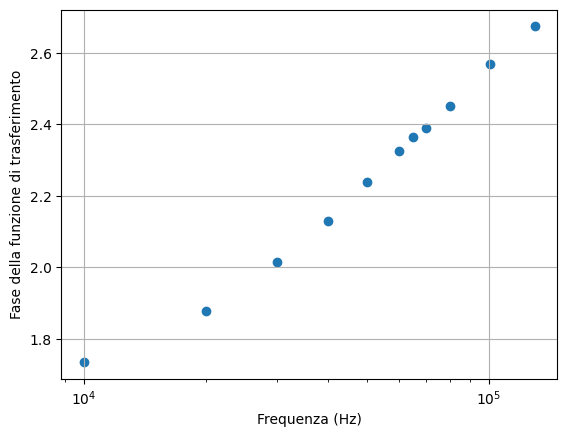

In [635]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Fase della funzione di trasferimento")
ax.set_xscale("log")

plt.scatter(freq, phdiff)

plt.grid()
plt.show()

In [636]:
def model(x,a):
    return a / x

tan_ph = np.tan(phdiff)
ph_err = 0.04 * tan_ph

minimi_quadrati = LeastSquares(freq, tan_ph, ph_err, model)

m = Minuit(minimi_quadrati, a = -100)
m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))
print(m.ndof)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.931 (χ²/ndof = 0.4)      │              Nfcn = 18               │
│ EDM = 1.89e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  -64.0e3  │   0.8e3   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────┐
│   │        a │
├───┼──────────┤
│ a │ 5.96e+05 │
└───┴──────────┘

p value: 0.9503865521256307
10.0


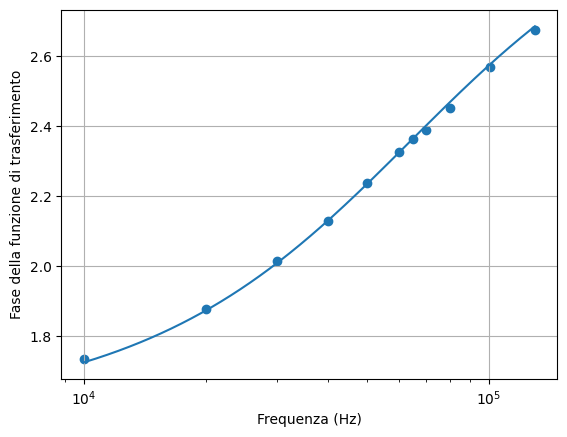

In [637]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Fase della funzione di trasferimento")
ax.set_xscale("log")

plt.scatter(freq, phdiff)
x = np.linspace(min(freq),max(freq),10000)
y = np.pi + np.arctan(model(x,m.values["a"]))
plt.plot(x,y)

plt.grid()
plt.show()

#### Tensione ai capi della resistenza

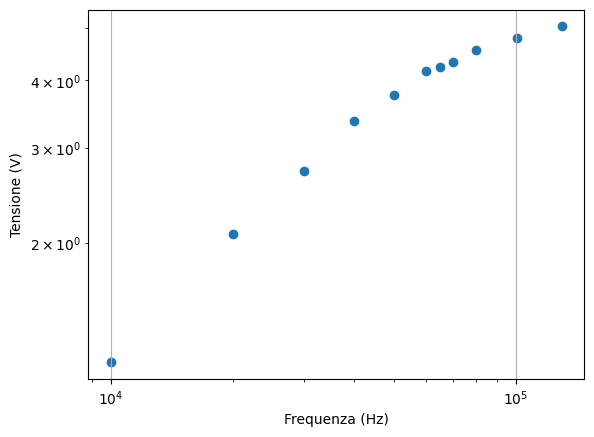

In [638]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Tensione (V)")
ax.set_xscale("log")
ax.set_yscale("log")

plt.scatter(freq, Vin_out)

plt.grid()
plt.show()

In [639]:
def model(x,a,b):
    return 1 / np.sqrt(a + b/(x**2))

V_err = 0.04 * Vin_out

minimi_quadrati = LeastSquares(freq, Vin_out, V_err, model)

m = Minuit(minimi_quadrati, a = 1, b = 1)
m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))
print(m.ndof)

C:\Users\tassi\AppData\Local\Temp\ipykernel_7452\3462231676.py:2: RuntimeWarning: invalid value encountered in sqrt
  return 1 / np.sqrt(a + b/(x**2))


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 6.048 (χ²/ndof = 0.7)      │              Nfcn = 168              │
│ EDM = 1.27e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  0.0371   │  0.0019   │            │            │         │         │       │
│ 1 │ b    │   76e6    │    4e6    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────────────┐
│   │               a               b │
├───┼─────────────────────────────────┤
│ a │        3.49e-06 -4.9698541946e3 │
│ b │ -4.9698541946e3        1.97e+13 │
└───┴─────────────────────────────────┘

p value: 0.7350746197556823
9.0


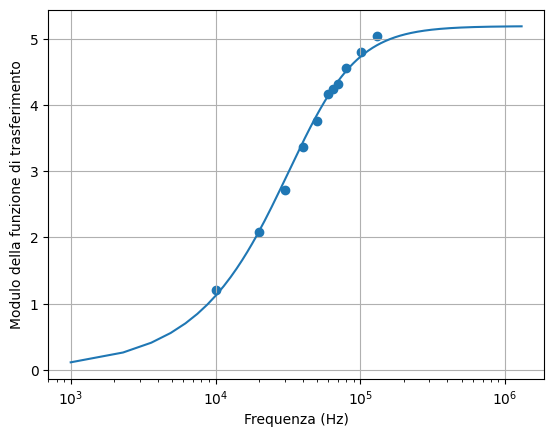

In [640]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")

plt.scatter(freq, Vin_out)
x = np.linspace(min(freq)/10,max(freq)*10,1000)
y = model(x,m.values["a"],m.values["b"])
plt.plot(x,y)

plt.grid()
plt.show()

### Circuito RL

In [641]:
R = 266.6 #ohm
R_tot = R + 50 
L = 35 * 10 ** (-3) #farad

freq = R_tot / (L*2*np.pi)
print(freq)

1439.6701423684017


In [642]:
data = np.loadtxt("Dati/RL.txt") #media di 16 campionamenti

freq = []
Vin = [] #picco picco
Vout = []
Vin_out = []
phdiff = [] #phase difference

for i in range(len(data)):
    freq.append(data[i][0] * 1000)
    Vin.append(data[i][1])
    Vout.append(data[i][2])
    Vin_out.append(data[i][3])
    phdiff.append(np.pi/2 + data[i][4] * np.pi / 180)

freq = np.array(freq)
Vin = np.array(Vin)
Vout = np.array(Vout)
Vin_out = np.array(Vin_out)
phdiff = np.array(phdiff)

#### Funzione di trasferimento VB / VA

Modulo

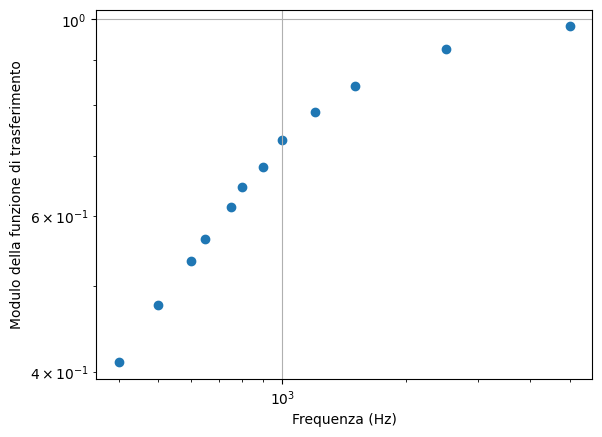

In [643]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")
ax.set_yscale("log")

plt.scatter(freq, Vout/Vin)

plt.grid()
plt.show()

Fase

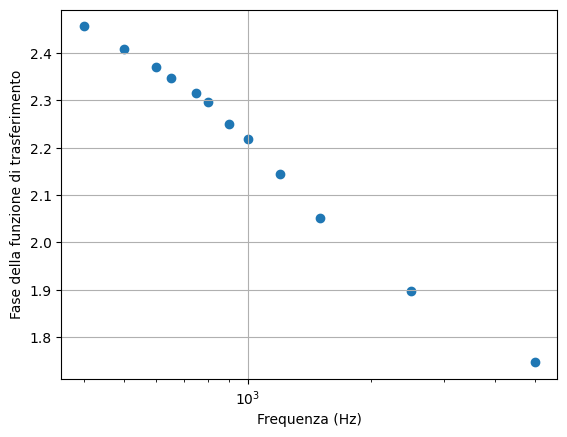

In [644]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Fase della funzione di trasferimento")
ax.set_xscale("log")

plt.scatter(freq, phdiff)

plt.grid()
plt.show()

In [645]:
def model(x,a):
    return a * x

tan_ph = np.tan(phdiff)
ph_err = 0.04 * tan_ph

minimi_quadrati = LeastSquares(freq, tan_ph, ph_err, model)

m = Minuit(minimi_quadrati, a = -100)
m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))
print(m.ndof)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 183.7 (χ²/ndof = 16.7)     │              Nfcn = 20               │
│ EDM = 1.33e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │ -1.382e-3 │ 0.016e-3  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────┐
│   │        a │
├───┼──────────┤
│ a │ 2.61e-10 │
└───┴──────────┘

p value: 0.0
11.0


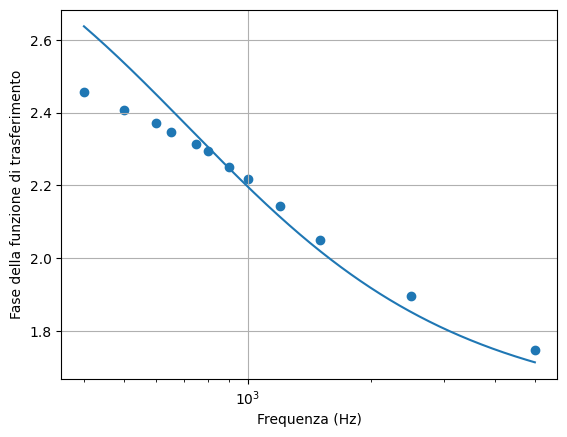

In [646]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Fase della funzione di trasferimento")
ax.set_xscale("log")

plt.scatter(freq, phdiff)
x = np.linspace(min(freq),max(freq),10000)
y = np.pi + np.arctan(model(x,m.values["a"]))
plt.plot(x,y)

plt.grid()
plt.show()

#### Tensione ai capi della resistenza

In [647]:
def model(x,a,b):
    return 1 / np.sqrt(a + b*(x**2))

V_err = 0.02 * Vin_out

minimi_quadrati = LeastSquares(freq, Vin_out, V_err, model)

m = Minuit(minimi_quadrati, a = 0.005, b = 0.00000001)
m.strategy = 2
m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))
print(m.ndof)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 7.71 (χ²/ndof = 0.8)       │              Nfcn = 113              │
│ EDM = 3.33e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  43.5e-3  │  1.0e-3   │            │            │         │         │       │
│ 1 │ b    │  28.2e-9  │  0.9e-9   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────────┐
│   │             a             b │
├───┼─────────────────────────────┤
│ a │      9.03e-07 -479.9464e-15 │
│ b │ -479.9464e-15      7.42e-19 │
└───┴─────────────────────────────┘

p value: 0.6571231028505302
10.0


### Circuito RLC

In [648]:
L = 14 * 10 ** (-3)
C = 10 * 10 ** (-9)
R = 266.6 #ohm
R_tot = R + 50 

omega0 = 1/np.sqrt(L*C)
print(omega0/(2*np.pi))

13451.047731519027


In [649]:
data = np.loadtxt("Dati/RLC.txt") #media di 16 campionamenti

freq = []
Vin = [] #picco picco
Vout = []
phdiff = [] #phase difference

if len(data.shape) == 1:
    data = data.reshape(-1, 4)  # Assuming 4 columns

freq = data[:, 0] * 1000
Vin = data[:, 1]
Vout = data[:, 2]
phdiff = data[:, 3] * np.pi / 180

freq = np.array(freq)
Vin = np.array(Vin)
Vout = np.array(Vout)
phdiff = np.array(phdiff)

### Funzione di trasferimento della resistenza

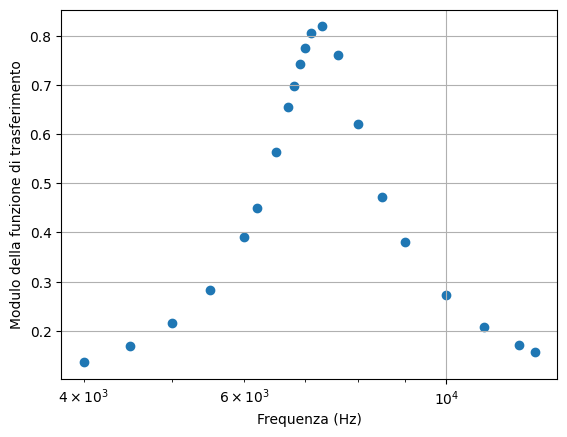

In [650]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")
#ax.set_yscale("log")

plt.scatter(freq, Vout/Vin)

plt.grid()
plt.show()

In [651]:
def model(x,a,b,c):
    return 1 / np.sqrt(a + (b*x - c/x)**2)

V_err = 0.02 * Vout/Vin

minimi_quadrati = LeastSquares(freq, Vout/Vin, V_err, model)

m = Minuit(minimi_quadrati, a = 10**10 / (25*10**10), b = -56/(25*10**10), c = -(10**9)/(25*10**10))
m.strategy = 2
m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))
print(m.ndof)

C:\Users\tassi\AppData\Local\Temp\ipykernel_7452\2297695258.py:2: RuntimeWarning: invalid value encountered in sqrt
  return 1 / np.sqrt(a + (b*x - c/x)**2)


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 11.97 (χ²/ndof = 0.7)      │              Nfcn = 569              │
│ EDM = 7.88e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  -125.7   │    1.3    │            │            │         │         │       │
│ 1 │ b    │  -772e-6  │   4e-6    │            │            │         │         │       │
│ 2 │ c    │  41.18e3  │  0.21e3   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────────────────────────────────────────┐
│   │              a              b              c │
├───┼──────────────────────────────────────────────┤
│ a │           1.69    5.224491e-6         -266.2 │
│ b │    5.224491e-6       1.73e-11 -765.784050e-6 │
│ c │         -266.2 -765.784050e-6       4.48e+04 │
└───┴──────────────────────────────────────────────┘

p value: 0.8487149714596303
18.0


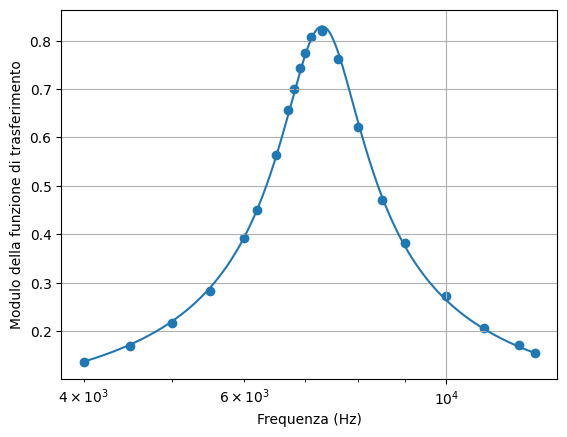

In [652]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")

plt.scatter(freq, Vout/Vin)
x = np.linspace(min(freq),max(freq),10000)
y = model(x,m.values["a"],m.values["b"],m.values["c"])
plt.plot(x,y)

plt.grid()
plt.show()